
# Inlever opdracht: Bucket sort 

Schrijf een implementatie van het onderstaande Bucket Sort algoritme voor het sorteren van gehele getallen 

Een bucket sort begint met een een-dimensionale array van n positieve nummers die gesorteerd worden en een twee-dimensionale array van integers, met rijen genummerd van 0 tot 9 en kolommen geïndexeerd van 0 tot n-1. Elke rij in de twee-dimensionale array heeft een bucket.  Het algoritme werkt dan alsvolgt:



Plaats elke waarde van de een-dimensionale array in een rij van de bucket array, gebaseerd op het meest rechtse cijfer in het getal (de "een"-waarde). Bijvoorbeeld, 97 wordt geplaatst in rij 7, 3 wordt geplaatst in rij 3 en 100 wordt geplaatst in rij 0. Deze stap heet de distribution pass.
  
  
Loop door de bucket array rij voor rij, en kopieer de waardes terug in de originele array. Deze stap heet de gathering pass. De volgorde van de hierboven genoemde getallen is dus nu 100, 3, 97.
    
Herhaal dit proces voor elke volgende digit-positie (dus voor de tientallen, honderdtallen, etc.). Na de laatste gathering pass is de array gesorteerd.

## Aanpak oplossing

Voordat we met coderen beginnen, is het handig om de werking van het algoritme in Pseudocodete schrijven. 

Function Bucket_sot(Array):

    1. Bepaal de lengte van de array 
    2. Maak op basis van dat een lege arraymet n aantal lege lists
    3. Loop over de array met deze functie (elemet % 10 ** digits)
    4. Append de getallen in de buckets
    5. Append de gesorteerde lijst in een een nieuwe lijst
    6. Return de lijst 

Function Bucket_sort_neg(Array):

    1. Splits de lijst in twee lijsten van negatieve en positieve getallen. 
    2. Zet de negatieve lijst om naar positieve, maak gebruik van abs.
    3. Sorteer de twee lijsten afzonderlijk van elkaar door gebruik van de Bucket sort algoritme te maken.
    4. Zet de gesorteerde lijst van de negative getallen weer in negatief en revers de lijst.
    5. Return de twee lijsten

__Code__

In [1]:
from numpy import random
import matplotlib.pyplot as plt 
import seaborn as sns
import time
import pandas as pd 

C:\Users\marya\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


We schrijven een functie die een random getallen genereerd op basis van een gegeven lengte. 

In [2]:
def generate_list(limits:int)-> [int]:
    """ 
    Generates list of random numbers
    
    :param
    -------
    limits: 
            list of the size of each random list
    """
    random_lijsten = []
    for limit in range(limits):
        random_lijsten.append(random.randint(1,1000))
    return random_lijsten

Vervolgens schrijven we een functie die een list met bucket kan genereren op basis van een gegeven lengte.

In [3]:
def generate_buckets(n: int)-> [[]]:
    """
    Generate x items buckets
    
    :param
    ------
    n: int 
        The lenght of the bucket list 
    """ 
    # Voor nu op 10 gezet aangezien dat de aantal lijsten die we nodig hebben
    buckets_list = [[] for _ in range(10)]

    return buckets_list

Nu is het tijd om de sort algoritme te maken.

In [4]:
def bucket_sort(lijst:[int])-> [int]:
    """ 
    A function that sorts a list usings buckets. 
    
    :param
    ------
    lijst: list
        The list that contains 3 random generate lists 
    
    """ 
    n = len(lijst)
    index = 10
    if n == 0:
        return lijst
    
     # Distribution step
    for i in range(len(repr(max(lijst)))): 
        generated_buckets = generate_buckets(n)
        for j in lijst:
            generated_buckets[(j % index) // (index // 10)].append(j)
        index = index * 10 # get the next digit positie

        # Gathering step
        lijst = []
        for i in generated_buckets:
            for j in i:
                lijst.append(j)
    return lijst

Het sorteer algoritme kan nu alleen een lijst van positieve getallen sorteren. We willen dat ons algoritme de hele verzameling van gehele getallen kan sorteren. Dus we gaan een extra stapje toevoegen waar we het sorteeren van negatieve getallen mogelijk maken. 

In [5]:
def bucket_sort_neg(lijst:[int])-> [int]:
    """ 
    A function that helps to sort of a mixd list. 
    
    :param
    ------
    lijst: list
        The list that contains a random generate list
        
    """
    # split de lijst in positive and negative getallen
    pos = list(filter(lambda x:x >= 0, lijst))
    neg = list(filter(lambda x:x < 0, lijst))
 
    # Get the abs value from the negative values 
    abs_neg = [abs(number) for number in neg]

    sort_pos = bucket_sort(pos)
    sort_neg= bucket_sort(abs_neg)

    sorted_neg = [num*-1 for num in sort_neg][::-1]

    return sorted_neg + sort_pos

__Run het algoritme__

 Met een lijst van 15 random positieve getallen

In [6]:
list_to_sort = generate_list(15)

In [7]:
list_to_sort

[118, 116, 721, 371, 264, 672, 477, 800, 794, 105, 99, 721, 142, 300, 145]

In [8]:
bucket_sort_neg(list_to_sort)

[99, 105, 116, 118, 142, 145, 264, 300, 371, 477, 672, 721, 721, 794, 800]

Met een gegeven lijst van negatieve en postieve getallen

In [9]:
bucket_sort_neg([50, 0, 1, -15 , 1 , 2 , 31 , -1 , -88 ,-165])

[-165, -88, -15, -1, 0, 1, 1, 2, 31, 50]

En als laatste; een lijst met alleen maar negatieve getallen

In [10]:
bucket_sort_neg([-50, -1, -15 , -1 , -2 , -31 , -1 , -88 ,-165])

[-165, -88, -50, -31, -15, -2, -1, -1, -1]

__Snelheid van het algoritme__

Hier gaan we de snelheid van het algroritme testen door het algoritme meerdere lists van verschillende lengtes te laten runnen.

In [11]:
def calculate_time(sort_algoritme , list_of_random_list):
    """
    calculates the time that each algorithm takes to sort the lists
    
    :param
    -------
    sort_algorithme:
            the name of the sort algorithm
    list_of_random_list: 
            the list with the random nummbers 
    """
    list_with_times = []
    list_with_n_times = {}
    for this_list in list_of_random_list:
        time1 = time.time()
        sort_algoritme(this_list)
        time2 = time.time()
        list_with_times.append(time2 - time1)
        list_with_n_times[len(this_list)] = time2 - time1

    return list_with_n_times

__Random niet gesorteerde lijsten__

We maken er 3 veschillende lijsten van random getallen, die gaan we het algoritme laten sorteren 

In [12]:
duizend_list = generate_list(1000)
tienduizend_list = generate_list(10000)
dertigduizend_list = generate_list(30000)

lists_to_sort= [duizend_list, tienduizend_list, dertigduizend_list]

In [13]:
antwoord = calculate_time(bucket_sort_neg, lists_to_sort)

In [14]:
antwoord

{1000: 0.0009989738464355469,
 10000: 0.00800776481628418,
 30000: 0.022906064987182617}

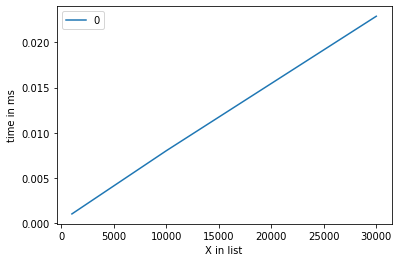

In [16]:
grafiek1 = sns.lineplot(data = pd.DataFrame.from_dict(antwoord, orient='index'))
grafiek1.set(xlabel='X in list', ylabel='time in ms')
plt.show()

__Random niet gesoorterde lijsten reversed__

Het algoritme sorteert de lijsten best snel! Maar wat zou er gebeuren als we de lijst omdraaien?

In [17]:
reversed_list = [elem[::-1] for elem in lists_to_sort]

In [18]:
antwoord_reversed = calculate_time(bucket_sort, lists_to_sort)

In [19]:
antwoord_reversed

{1000: 0.0, 10000: 0.005983829498291016, 30000: 0.020944595336914062}

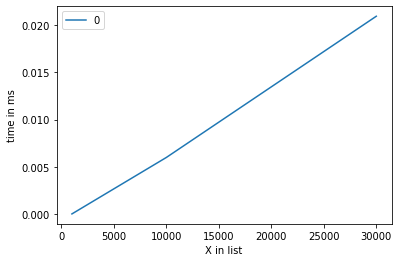

In [20]:
grafiek2 = sns.lineplot(data = pd.DataFrame.from_dict(antwoord_reversed, orient='index'))
grafiek2.set(xlabel='X in list', ylabel='time in ms')
plt.show()

Het algoritme doet nu iets langer over, maar nog steeds niet slecht! 

__Gesorteerde lijst__

In [21]:
def generate_sorted_list(limit:int)->[[int]]:
    """
    Een functie die een gesorteerde lijst aanmaakt
    :param
    ------
    limit:int 
        De
    """
    lijst =[i for i in range(limit)]
    return lijst

In [22]:
duizend_list = generate_sorted_list(1000)
tienduizend_list = generate_sorted_list(10000)
dertigduizend_list = generate_sorted_list(30000)

lists_to_sort_sorted= [duizend_list, tienduizend_list, dertigduizend_list]

In [23]:
antwoord_sorted= calculate_time(bucket_sort_neg, lists_to_sort_sorted)

In [24]:
antwoord_sorted

{1000: 0.0009989738464355469,
 10000: 0.009948492050170898,
 30000: 0.03992199897766113}

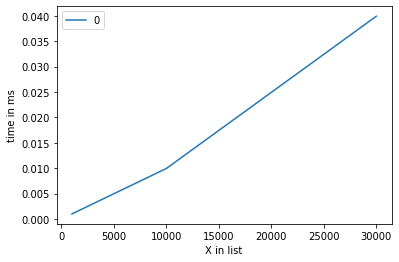

In [25]:
grafiek3 = sns.lineplot(data = pd.DataFrame.from_dict(antwoord_sorted, orient='index'))
grafiek3.set(xlabel='X in list', ylabel='time in ms')
plt.show()

__Gesorteerde lijsten reversed__

In [26]:
reversed_list_sorted = [elem[::-1] for elem in lists_to_sort]

In [27]:
antwoord_reversed_sorted = calculate_time(bucket_sort, lists_to_sort)

In [28]:
antwoord_reversed_sorted

{1000: 0.0019969940185546875,
 10000: 0.011965751647949219,
 30000: 0.031914472579956055}

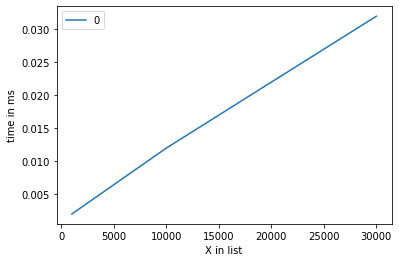

In [30]:
grafiek4 = sns.lineplot(data = pd.DataFrame.from_dict(antwoord_reversed_sorted, orient='index'))
grafiek4.set(xlabel='X in list', ylabel='time in ms')
plt.show()

__Tijds- en ruimtecomplexiteit van het algoritme__

Aller eerst loopt het algoritme door alle getallen van list 2 keer om de positieve en de negatieve getallen te scheiden. (2n)




Daarna loop het door de negatieve getallen en zet dat in positieve getallen om (abs) voor x aantal negatieve getallen. 


Vervolgens wordt de volgende stappen twee keer uitgevoerd voor zowel de positieve als de negatieve getallen:
        - Loop door alle int's van de lijst (n)
        - Sorteer alle buckets(n)
        - Loop k aantal keer voor de positieve getallen en l aantal keer voor de negatieve getallen. 
        




Nadat het algoritme op de abs van de negatieve getallen en de positieve getallen gerund, wat betekent dat beide lijsten nu gesorteerd zijn, moeten de abs van de negatieve getallen terug zetten naar negatief. (2n)





De laatste stap is het mergen van de positieve en de negatieve lijsten. (2n)



De uiteindelijk resultaat kan zoals hieronder opgevat worden:

__Worse case:__
        
\begin{equation*}O((x+n)+ (x+n) + (x+n) + k(2n) + l(2n)) \end{equation*}

\begin{equation*}O(3(x+n)+ k(2n) + l(2n))\end{equation*}

       


__Best case:__

        Wanneer er geen negatieve getallen zijn dus x = 0 
        
\begin{equation*} O(3n +l(2n))\end{equation*}
 
 
 


Er zijn natuurlijk nog andere factoren die invloed zouden hebben bij het werking van het algoritme. Denk er bij aantal items van de lijst, of de lijst al gesorteerd is of de lijst reveresed is. 

Omdat het aantal items in de lijst een grote invloed op de werking van het algoritme heeft, kunnen we het als volgt beschrijven:

Stel je voor dat G voor het aantal getallen in een lijst staat, dan zou de complexiteit van het algoritme als volgt uitzien $O((2G)n)$ 

Dit kunnen we uiteindelijk naar $O(n)$ versimplen. Maar het is nog steeds belangrijk om op te merken omdat dit algoritme in bepaalde lijsten slechter presteert dan een $O(n!)$ algoritme.

__Big O waarde van Bucket Sort__

Uit de vorige analyse kunnen we de Big O waarde versimplen tot:

Tijd compexiteit:
   - Best case $O(n+k)$ 
   - Worst case $O(n^2)$ 

Ruimte complexiteit:
   - Worst case $O(nk)$

## Extra 

1. sorteren van getallen met cijfers achter de komma 
2. Laat bij je analyse zien dat je onderzoek hebt gedaan over wat wel en niet mee te nemen in je analyse (is een variable assignment een stap? hoeveel ruimte kost je datastructuur?)


In [ ]:
# TODO : documenteer alles, maak de extra's en voeg een paar analyse plaatjes toe!
#TODO : Laat het algoritme ook negative getallen sorteren 